In [1]:
from __future__ import division, print_function, unicode_literals

In [2]:
import numpy as np
import os

np.random.seed(42)
import matplotlib as mpl
import matplotlib.pyplot as plt

Project_Root_Directory = "."
Section_Id             = "Logistic Regression"
Images_Path            = os.path.join(Project_Root_Directory, "images", Section_Id)
os.makedirs(Images_Path, exist_ok =True)


- Linear Regression
$$ f(x) = w^Tx 
$$
- Logistic regression
$$ f(x) = \theta(w^T x),
$$
$\theta$ is logistic function.
- Sigmoid function
$$ f(s) = \frac{1}{1+e^{-s}}
$$
$f$ has values in $(0,1)$.Its derivative
$$ f'(s) = \frac{e^{-s}}{(1+e^{-s})^2} = f(s)(1-f(s))
$$
- Tanh function
$$ tanh(s) = \frac{e^s - e^{-s}}{e^s + e^{-s}}
$$
whose values is in $(-1,1)$.

# Loss function
Suppose the the probability of a point $x$ belong to class 1 is $f(w^Tx)$ and fall into class 0 is $1-f(w^Tx)$. With training data, we write
$$ P(y_i =1|x_i; w) = f(w^Tx_i)
$$
$$ P(y_i =0|x_i; w) =1- f(w^Tx_i)
$$
where $P(y_i =1|x_i; w)$ is the probability that $y_1=1$ provided the parameter $w$ and the input $x_i$.

Let $z_i = f(w^Tx_i)$, we can write
$$ P(y_i|x_i; w) =  z_i^{y_i}(1-z_i)^{1-y_i}.
$$

The train set $X\in R^{d\times N}$ and $y\in R^{1\times N}$, we want to look for $w$ such that it maximizes
$$ P(y|X; w),
$$
this function is called likelihood function.
In order words:
$$ w^* = arg \max_{w} P(y|X; w) = arg \max_{w} \prod_{i=1}^N P(y|x_i; w) = \prod_{i=1}^N z_i^{y_i}(1-z_i)^{1-y_i}
$$
Since the value of probability is often small thus lead to numerical error. To avoid this, we take the natural logarithm
$$ J(w) = -\ln  P(y|X; w) =  - \sum_{i=1} ^N (y_i\ln z_i + (1-y_i)\ln (1-z_i))
$$

In [34]:
X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 
              2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])
print(X.shape)

(1, 20)


In [35]:
# Extended data
X = np.concatenate((np.ones((1, X.shape[1])), X), axis =0)
X.shape

(2, 20)

In [43]:
X.shape[1]

20

In [46]:
def sigmoid(s):
    return 1/(1+ np.exp(-s))

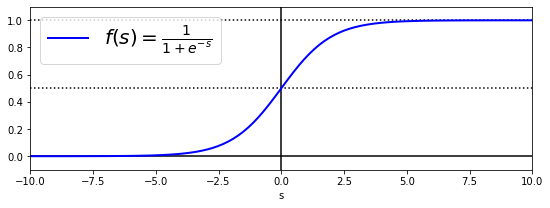

In [61]:
s = np.linspace(-10, 10, 100)
sig = sigmoid(s)
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$f(s) = \frac{1}{1 + e^{-s}}$")
plt.xlabel("s")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

In [6]:
def logistic_sigmoid_regression(X, y, w_init, eta, tol =1e-4, max_count =10000):
    w   = [w_init]
    it  = 0
    d, N =  X.shape
    count = 0
    check_w_after = 20
    
    while count < max_count:
        mix_id = np.random.permutation(N)# mix data
        for i in mix_id:
            xi = X[:,i].reshape(d,1)
            yi = y[i] 
            zi = sigmoid(np.dot(w[-1].T, xi))
            w_new = w[-1] + eta*(yi - zi)*xi
            count += 1
            # stopping criteria
            if count % check_w_after == 0:                
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:   # 2-norm
                    return w
            w.append(w_new)
    return w

In [7]:
eta = .05 
d = X.shape[0]
w_init = np.random.randn(d, 1)

w = logistic_sigmoid_regression(X, y, w_init, eta)
print(w[-1])

[[-4.07402882]
 [ 1.62295903]]


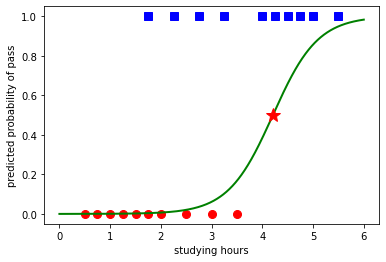

In [65]:
X0 = X[1, np.where(y == 0)][0]
y0 = y[np.where(y == 0)]
X1 = X[1, np.where(y == 1)][0]
y1 = y[np.where(y == 1)]

plt.plot(X0, y0, 'ro', markersize = 8)
plt.plot(X1, y1, 'bs', markersize = 8)

xx = np.linspace(0, 6, 1000)
w0 = w[-1][0][0]
w1 = w[-1][1][0]
threshold = -w0/w1
yy = sigmoid(w0 + w1*xx)

plt.plot(xx, yy, 'g-', linewidth = 2)
plt.plot(threshold, .5, 'r*', markersize = 15)
plt.xlabel('studying hours')
plt.ylabel('predicted probability of pass')
plt.show()

### Two dimension data

findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


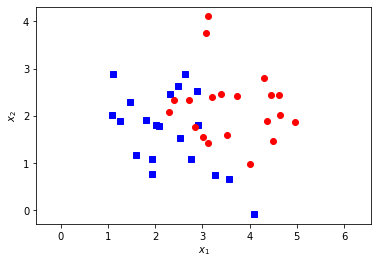

In [25]:
from scipy.spatial.distance import cdist
np.random.seed(22)

means = [[2,2], [4,2]]
cov   = [[.7, 0], [0, .7]]
N     = 20
X0    = np.random.multivariate_normal(means[0], cov, N)
X1    = np.random.multivariate_normal(means[1], cov, N)

plt.plot(X0[:,0], X0[:,1], "bs")
plt.plot(X1[:,0], X1[:,1], "ro")
plt.axis("equal")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

In [23]:
X = np.concatenate((X0,X1), axis =0).T
y = np.concatenate((np.zeros((1, N)), np.ones((1, N))), axis = 1).T
# Xbar 
X = np.concatenate((np.ones((1, 2*N)), X), axis = 0)

eta = .05 
d = X.shape[0]
w_init = np.random.randn(d, 1)

w = logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_count= 10000)
print(w[-1])

[[-9.51043127]
 [ 2.25978315]
 [ 1.42588178]]


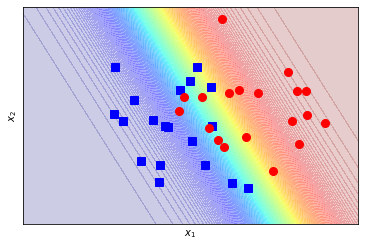

In [29]:
xm = np.arange(-1, 6, 0.025)
xlen = len(xm)
ym = np.arange(0, 4, 0.025)
ylen = len(ym)
xm, ym = np.meshgrid(xm, ym)
w0 = w[-1][0][0]
w1 = w[-1][1][0]
w2 = w[-1][2][0]
zm = sigmoid(w0 + w1*xm + w2*ym)

CS = plt.contourf(xm, ym, zm, 200, cmap='jet', alpha = 0.2)

plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = 1)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = 1)
plt.axis('equal')
plt.ylim(0, 4)
plt.xlim(0, 5)

# hide tikcs 
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()



###  sklearn and Iris data set

In [66]:
from sklearn import datasets
iris  = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [ ]:
X = iris["data"][:, 3:]  # petal width
y = iris["target"] == 2  # extract target ==2
y = y.astype(np.int)  # Numerial True/Fault: 1 if Iris virginica, else 0

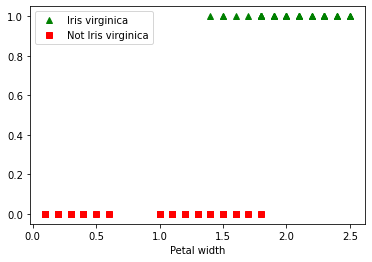

In [85]:
plt.plot(X[y==1], y[y==1], "g^", label="Iris virginica")
plt.plot(X[y==0], y[y==0], "rs", label="Not Iris virginica")
plt.xlabel("Petal width")
plt.legend()

In [74]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

In [75]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

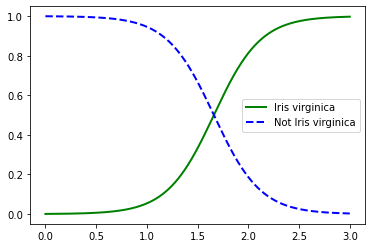

In [77]:
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.legend()

C:\Users\tranli\Wdomain\lib\site-packages\matplotlib\patches.py:1338: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  verts = np.dot(coords, M) + (x + dx, y + dy)


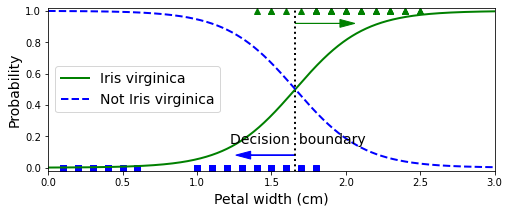

In [78]:
X_new   = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")

plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

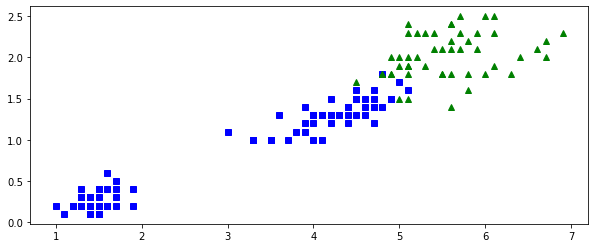

In [86]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)
log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid( np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),  )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

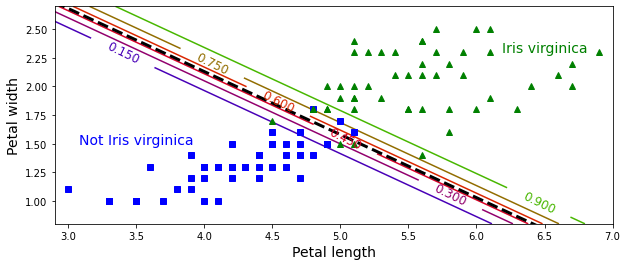

In [93]:
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")
zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)

left_right = np.array([2.9, 7])
boundary   = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]
plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

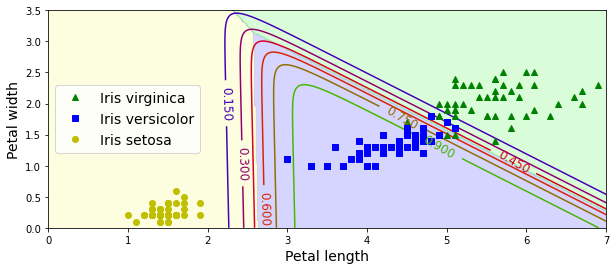

In [113]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

x0, x1 = np.meshgrid( np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),   )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap, alpha =0.4)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()